In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import re

In [2]:
df=pd.read_csv('Twitter_Data.csv', encoding='latin1')

In [3]:
df=df.dropna()

In [4]:
df

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [5]:
df_neg=df[df['category']==-1]
df_nu=df[df['category']==0]
df_pos=df[df['category']==1]

In [6]:
df_pos['category'].value_counts()

category
1.0    72249
Name: count, dtype: int64

In [7]:
df_nu['category'].value_counts()

category
0.0    55211
Name: count, dtype: int64

In [8]:
df_pos=df_pos.sample(35000)
df_nu=df_nu.sample(35000)

In [9]:
df2=pd.concat([df_pos,df_neg,df_nu],axis=0)
df2['category'].value_counts()

category
-1.0    35509
 1.0    35000
 0.0    35000
Name: count, dtype: int64

In [10]:
df

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [11]:
df2['category'].unique()

array([ 1., -1.,  0.])

In [12]:
df2['category'].value_counts()

category
-1.0    35509
 1.0    35000
 0.0    35000
Name: count, dtype: int64

In [13]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [14]:
df2

,clean_text,category
12229,kanhaiya plans reach out the voter person not ...,1.0
114438,please give good replacement modi with better ...,1.0
34150,video narendra modi new song out salman khans ...,1.0
96258,easy credit under modi govt get loan for busin...,1.0
67714,congrees thinks modi leaving stone unturned br...,1.0
...,...,...
58443,yes modi declaring the result and announcing t...,0.0
113872,modi deserve this,0.0
106847,although know that cant wake person like shahi...,0.0
121273,and was the hope for how you even hope defeat ...,0.0


In [15]:
def remove_html_tags(text):
  if isinstance(text, str):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

In [16]:
def remove_emoji(text):
  text = text.encode('ascii', 'ignore').decode('ascii')

In [17]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
exclude = string.punctuation

def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

#df2['clean_text'] = df2['clean_text'].apply(remove_punc1)

In [19]:
chat_words={
    'ive':'i have',
    'couldnt':'could not',
    'id':'i had',
    'im':'i am',
    'dont':'do not',
    'its':'it is',
    'ur':'your',
    'asap':'as soon as possible',
    'isnt':'is not',
    'thx':'thanks',
    'ig':'i guess',
    'nyc':'New York',
    'm':'am',
    'omg':'oh my god',
    'u':'you'
}

In [20]:
chat_words

{'ive': 'i have',
 'couldnt': 'could not',
 'id': 'i had',
 'im': 'i am',
 'dont': 'do not',
 'its': 'it is',
 'ur': 'your',
 'asap': 'as soon as possible',
 'isnt': 'is not',
 'thx': 'thanks',
 'ig': 'i guess',
 'nyc': 'New York',
 'm': 'am',
 'omg': 'oh\xa0my\xa0god',
 'u': 'you'}

In [21]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.lower() in chat_words:
            new_text.append(chat_words[w.lower()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_text(text):
    lemmatized_text = " ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split()])
    return lemmatized_text

In [24]:
df2

,clean_text,category
12229,kanhaiya plans reach out the voter person not ...,1.0
114438,please give good replacement modi with better ...,1.0
34150,video narendra modi new song out salman khans ...,1.0
96258,easy credit under modi govt get loan for busin...,1.0
67714,congrees thinks modi leaving stone unturned br...,1.0
...,...,...
58443,yes modi declaring the result and announcing t...,0.0
113872,modi deserve this,0.0
106847,although know that cant wake person like shahi...,0.0
121273,and was the hope for how you even hope defeat ...,0.0


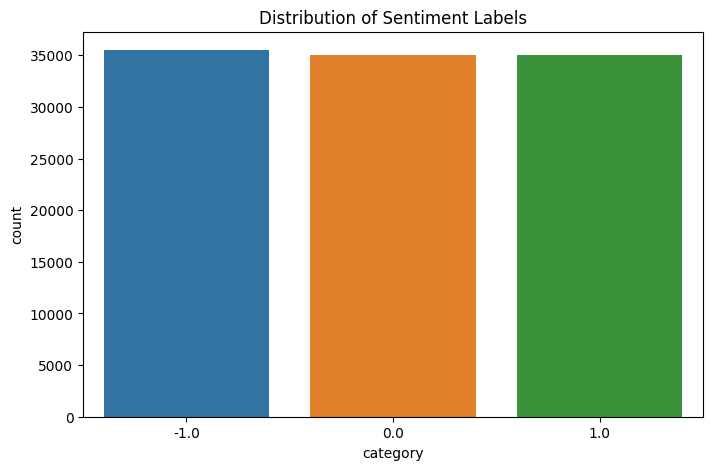

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df2)
plt.title('Distribution of Sentiment Labels')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df2['category'] = lab.fit_transform(df2['category'])
df2['category']

12229     2
114438    2
34150     2
96258     2
67714     2
         ..
58443     1
113872    1
106847    1
121273    1
39489     1
Name: category, Length: 105509, dtype: int64

In [27]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
positive_texts = df2[df2['category'] == 2]['clean_text']
negative_texts = df2[df2['category'] == 0]['clean_text']
Neutral_texts = df2[df2['category'] == 1]['clean_text']

In [28]:
positive_text = " ".join(positive_texts)
negative_text = " ".join(negative_texts)
Neutral_text = " ".join(Neutral_texts)

In [29]:
stopwords_set = set(stopwords.words('english'))

positive_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                               stopwords=stopwords_set, colormap='Greens').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                               stopwords=stopwords_set, colormap='Reds').generate(negative_text)
Neutral_wordcloud = WordCloud(width=800, height=400, background_color='white', 
                               stopwords=stopwords_set, colormap='Blues').generate(Neutral_text)

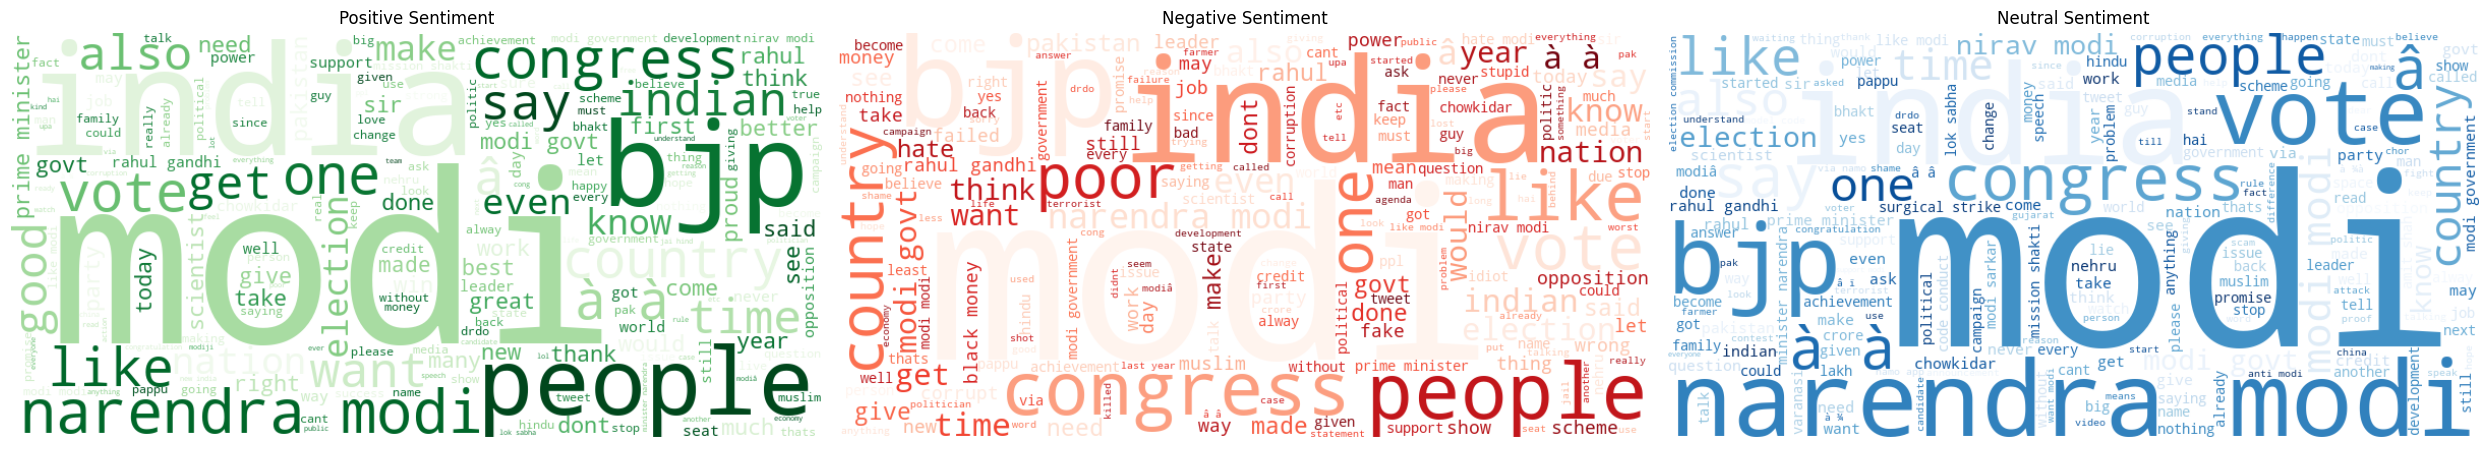

In [30]:
plt.figure(figsize=(25, 10))

# Positive Word Cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

#Neutral Word Cloud
plt.subplot(1, 3, 3)
plt.imshow(Neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')


plt.tight_layout()
plt.show()

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105509 entries, 12229 to 39489
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  105509 non-null  object
 1   category    105509 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [32]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout,Embedding
from keras.preprocessing import sequence
from keras.models import load_model
import re
from nltk.tokenize import word_tokenize

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_features = 40000
batch_size = 32

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

In [35]:
def fillna_transformer(x):
    return x.fillna('').astype(str)

def lowercase_transformer(x):
    return x.apply(lambda x: x.lower())

def remove_url_transformer(x):
    return x.apply(remove_url)

def remove_html_tags_transformer(x):
    return x.apply(remove_html_tags)

def remove_punc_transformer(x):
    return x.apply(remove_punc1)

def chat_conversion_transformer(x):
    return x.apply(chat_conversion)

def lemmatize_text_transformer(x):
    return x.apply(lemmatize_text)

In [36]:
text_cleaning_pipeline = Pipeline([
    ('fillna', FunctionTransformer(fillna_transformer)),  # Ensure all data is string
    ('lowercase', FunctionTransformer(lowercase_transformer)),
    ('remove_url', FunctionTransformer(remove_url_transformer)),
    ('remove_html_tags', FunctionTransformer(remove_html_tags_transformer)),
    ('remove_punc', FunctionTransformer(remove_punc_transformer)),
    ('chat_conversion', FunctionTransformer(chat_conversion_transformer)),
    ('lemmatize_text', FunctionTransformer(lemmatize_text_transformer)),
])

In [37]:
df2['clean_text'] = text_cleaning_pipeline.fit_transform(df2['clean_text'])

In [41]:
tokenizer = Tokenizer(num_words=max_features)

tokenizer.fit_on_texts(df2['clean_text'])
sequences = tokenizer.texts_to_sequences(df2['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=100,padding = 'post')

In [42]:
labels = np.array(df2['category'])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [44]:
from tensorflow.keras.utils import to_categorical
num_classes = 3 
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)
y_train_one_hot

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [45]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, BatchNormalization, Dense, Dropout,Bidirectional,GRU
from keras.optimizers import Adam

In [47]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
max_length = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(64)))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │      10,127,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 64)             │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,244,227 (39.08 MB)

 Trainable params: 10,243,843 (39.08 MB)

 Non-trainable params: 384 (1.50 KB)

In [49]:
model.fit(X_train, y_train_one_hot, validation_split=0.1, epochs=5, batch_size=64)

Epoch 1/5
 194/1187 ━━━━━━━━━━━━━━━━━━━━ 3:05 187ms/step - accuracy: 0.9881 - loss: 0.0372

KeyboardInterrupt: 

In [50]:
accr1 = model.evaluate(X_test, y_test_one_hot)
accr1

660/660 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9040 - loss: 0.5055


[0.5008354783058167, 0.9052222371101379]

In [51]:
y_pred = model.predict(X_test)

660/660 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step


In [52]:
y_pred

array([[9.1754836e-01, 3.4077446e-05, 8.2417510e-02],
       [1.4048704e-05, 9.9882656e-01, 1.1594067e-03],
       [3.7096750e-06, 4.2170377e-05, 9.9995410e-01],
       ...,
       [1.7415099e-06, 9.9999559e-01, 2.6668883e-06],
       [1.5196630e-06, 9.9980098e-01, 1.9754133e-04],
       [9.9997997e-01, 1.4313092e-05, 5.7662155e-06]], dtype=float32)

In [53]:
y_pred_label=[np.argmax(i) for i in y_pred]
y_pred_label

[0,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred_label))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7232
           1       0.93      0.93      0.93      6889
           2       0.87      0.93      0.90      6981

    accuracy                           0.91     21102
   macro avg       0.91      0.91      0.91     21102
weighted avg       0.91      0.91      0.91     21102



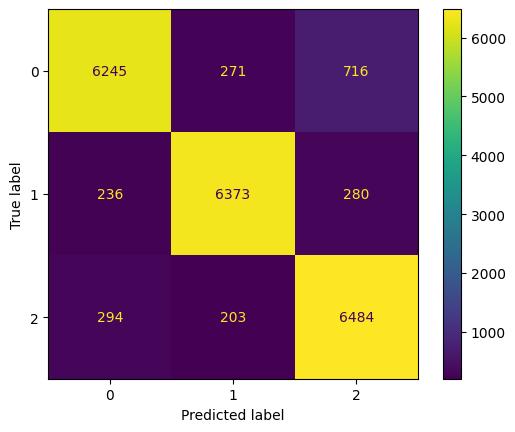

In [55]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_label);

In [56]:
def predict_sentiment(input_text, tokenizer, model, max_length):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='post')

    prediction = model.predict(padded_input_sequence)
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    predicted_label_index = np.argmax(prediction)
    predicted_sentiment = sentiment_labels[predicted_label_index]

    return predicted_sentiment

In [57]:
positive_rows = df2[df2['category'] == 2]
print(positive_rows[['clean_text']].head(5))

                                               clean_text
12229   kanhaiya plan reach out the voter person not s...
114438  please give good replacement modi with well vi...
34150   video narendra modi new song out salman khan h...
96258   easy credit under modi govt get loan for busin...
67714   congrees think modi leave stone unturned bring...


In [58]:
input_text = "The bakery's pastries were tasty, but the prices were steep. The service was slow, and the seating area felt cramped, detracting from the overall enjoyment of the visit."
predicted_sentiment = predict_sentiment(input_text, tokenizer, model, max_length)
print("Predicted Sentiment:", predicted_sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Sentiment: Negative


In [59]:
input_text = "the website is so slow."
predicted_sentiment = predict_sentiment(input_text, tokenizer, model, max_length)
print("Predicted Sentiment:", predicted_sentiment)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Sentiment: Negative


In [60]:
import pickle

In [61]:
pickle.dump(text_cleaning_pipeline,open('text_cleaning_pipeline.pkl','wb'))
pickle.dump(model,open('model_Final.pkl','wb'))

In [62]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)